In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PrePlacement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [3]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [4]:
#NO NAN VALUE FOR THE DATASET

# 2)How many of them are not placed?

In [5]:
dataset['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [6]:
if (dataset['status'] == "Not Placed").any():
    print("not placed")
else:
    print("placed")


not placed


In [7]:
not_placed_count = (dataset['status'] == "Not Placed").sum()
placed_count = (dataset['status'] != "Not Placed").sum()

print("Not Placed Count:", not_placed_count)
print("Placed Count:", placed_count)

Not Placed Count: 67
Placed Count: 148


In [8]:
# This method sums() True value is treated as 1 and False as 0.
#not placed student are 67

# 3)Find the reason for non placement from the dataset?

In [9]:
#Human errors during data collection and entry.
#Equipment or software breakdowns causing machine errors;
#The duration and nature of the study.
#Data transfer and conversion.

In [10]:
quan=[]
qual=[]
for columnName in dataset.columns:
    if(dataset[columnName].dtype=='O'):
        qual.append(columnName)
    else:
        quan.append(columnName)

In [11]:
dataset[quan]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,0.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [12]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [13]:

descriptive = pd.DataFrame(index=["Mean", "Median", "Mode"], columns=quan)

for columnName in quan:
    descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    descriptive.loc["Median", columnName] = dataset[columnName].median()  # Add median calculation
    descriptive.loc["Mode", columnName] = dataset[columnName].mode().iloc[0]
    data = {'status': dataset['status'],
        'ssc_p':dataset['ssc_p'],
        'hsc_p':dataset['hsc_p'],
        'degree_p':dataset['degree_p'],
        'etest_p':dataset['etest_p'],
        'mba_p':dataset['mba_p'],
        'salary':dataset['salary']}

df = pd.DataFrame(data)
df


,status,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,Placed,67.00,91.00,58.00,55.0,58.80,270000.0
1,Placed,79.33,78.33,77.48,86.5,66.28,200000.0
2,Placed,65.00,68.00,64.00,75.0,57.80,250000.0
3,Not Placed,56.00,52.00,52.00,66.0,59.43,0.0
4,Placed,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,Placed,80.60,82.00,77.60,91.0,74.49,400000.0
211,Placed,58.00,60.00,72.00,74.0,53.62,275000.0
212,Placed,67.00,67.00,73.00,59.0,69.72,295000.0
213,Placed,74.00,66.00,58.00,70.0,60.23,204000.0


In [14]:
import pandas as pd
def analyze_placement_stats(dataset, status_column, numeric_columns):
  
    placed_students = dataset[dataset[status_column] != "Not Placed"]
    non_placed_students = dataset[dataset[status_column] == "Not Placed"]

    # Calculate descriptive statistics for each group
    stats = {}
    for group_name, group_data in [("Placed", placed_students), ("Not Placed", non_placed_students)]:
        stats[group_name] = {}
        for col in numeric_columns:
            stats[group_name][col] = {
                "Mean": group_data[col].mean(),
                "Median": group_data[col].median(),
                "Mode": group_data[col].mode().iloc[0] if not group_data[col].mode().empty else None
            }

    # Convert to DataFrame for better display
    stats_df = pd.DataFrame(stats).T.stack().apply(pd.Series)
   

    return stats_df




data = {'status': dataset['status'],
        'ssc_p':dataset['ssc_p'],
        'hsc_p':dataset['hsc_p'],
        'degree_p':dataset['degree_p'],
        'etest_p':dataset['etest_p'],
        'mba_p':dataset['mba_p'],
        'salary':dataset['salary']}
df = pd.DataFrame(data)  # Create DataFrame with all the data

numeric_columns = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']  # List of numeric columns

result = analyze_placement_stats(df, 'status', numeric_columns)
print(result)

                              Mean      Median       Mode
Placed     ssc_p         71.721486      72.500      73.00
           hsc_p         69.837027      68.000      63.00
           degree_p      68.723649      68.000      65.00
           etest_p       73.238041      72.000      60.00
           mba_p         62.579392      62.245      56.70
           salary    287076.013514  265000.000  300000.00
Not Placed ssc_p         57.544030      56.280      52.00
           hsc_p         58.598358      60.330      42.75
           degree_p      61.134179      61.000      65.00
           etest_p       69.587910      67.000      60.00
           mba_p         61.612836      60.690      51.21
           salary         0.000000       0.000       0.00


In [15]:
#Observation: Significant difference. The "Placed" group shows a considerably higher performance .
                                    #the "not placed" group shows a considerably lower performance.

4)What kind of relation between salary and mba_p

In [16]:
#using an correlation concept

In [17]:
numeric_data = dataset.select_dtypes(include='number')
covariance_matrix = numeric_data.corr()
covariance_matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [18]:
#the relation between salary and mba_p
##mba_p to salary positive correlation directly proportional relation 14%

5)Which specialization is getting minimum salary?

In [19]:
dataset[["specialisation","salary"]]


,specialisation,salary
0,Mkt&HR,270000.0
1,Mkt&Fin,200000.0
2,Mkt&Fin,250000.0
3,Mkt&HR,0.0
4,Mkt&Fin,425000.0
...,...,...
210,Mkt&Fin,400000.0
211,Mkt&Fin,275000.0
212,Mkt&Fin,295000.0
213,Mkt&HR,204000.0


In [20]:
selected_data = dataset[["specialisation", "salary"]]

# Calculate the maximum salary
max_salary = selected_data['salary'].max()

# Calculate the minimum salary
min_salary = selected_data['salary'].min()

# Calculate the average salary
avg_salary = selected_data['salary'].mean() 

# Print the results
print("Maximum Salary:", max_salary)
print("Minimum Salary:", min_salary)
print("Average Salary:", avg_salary)





Maximum Salary: 706250.0
Minimum Salary: 0.0
Average Salary: 197615.11627906977


In [21]:
#geting maximum salry=706250.0
#minimum salary=0.0
#average salary=197615.11627906977

6)How many of them getting above 500000 salary?

In [22]:
#  Count how many salaries are above 500000
above_50000_count = (selected_data['salary'] > 500000).sum()

if above_50000_count > 0:
    print("There are", above_50000_count, "salaries above 500000")
else:
    print("No salaries are above 500000")

There are 3 salaries above 500000


7)Test the Analysis of Variance between etest_p and mba_p at signifance
 level 5%.(Make decision using Hypothesis Testing)

In [23]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

 8)Test the similarity between the degree_t(Sci&Tech) and specialisa
tion(Mkt&HR) with respect to salary at significance level of 5%.(Make
 decision using Hypothesis Testing)

In [24]:
#using an T-test concept

In [25]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
sci_tech=dataset[dataset['degree_t']=='Sci&Tech']['salary']
mkt_hr=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(sci_tech,mkt_hr)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

 9)Convert the normal distribution to standard normal distribution for
 salary column

In [26]:
import seaborn as sns

C:\Users\tiruk\AppData\Local\Temp\ipykernel_20696\2049611699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

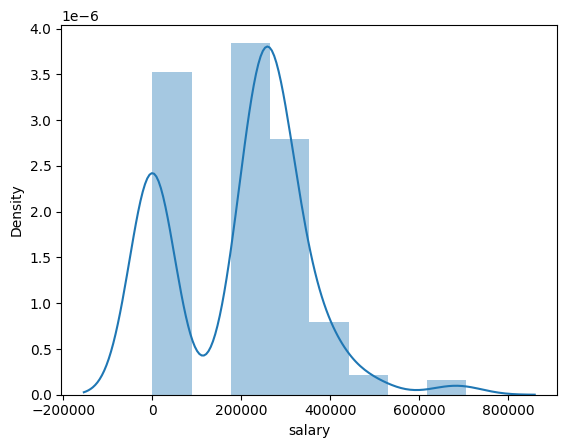

In [27]:
sns.distplot(dataset["salary"])

In [28]:
def stdNBgraph(ds):
    # converted to std normal distribution
    mean = ds.mean() 
    std = ds.std()  

    values = [i for i in ds]

    z_score = [((j - mean) / std) for j in values]  

    sns.distplot(z_score, kde=True)

    print(sum(z_score) / len(z_score))  


-1.115386852646669e-16


C:\Users\tiruk\AppData\Local\Temp\ipykernel_20696\1805382270.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


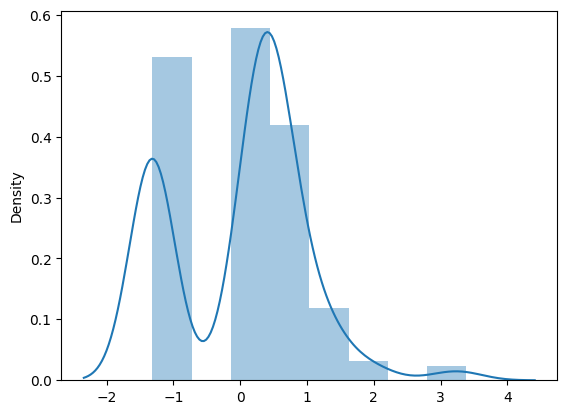

In [29]:
stdNBgraph(dataset['salary'])

 10)What is the probability Density Function of the salary range from
 700000 to 900000?

In [30]:
#pdf
def get_pdf_probability(ds,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(ds,kde=True,kde_kws={'color':'blue'},color='green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=ds
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' %(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)

    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
   
    return prob
    
          
    

In [ ]:
get_pdf_probability(dataset["salary"],700000,900000)

C:\Users\tiruk\AppData\Local\Temp\ipykernel_20696\1406800006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(ds,kde=True,kde_kws={'color':'blue'},color='green')


Mean=197615.116,Standard Deviation=150305.844


 11)Test the similarity between the degree_t(Sci&Tech)with respect to
 etest_p and mba_p at significance level of 5%.(Make decision using Hy
pothesis Testing)

In [ ]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
etest_p=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(etest_p,mba_p)

 12)Which parameter is highly correlated with salary?

In [ ]:
#using correlation

In [ ]:
numeric_data = dataset.select_dtypes(include='number')
covariance_matrix = numeric_data.corr()
covariance_matrix

In [ ]:
#ssc_p highly correlated with salary